In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=100,
                  centers=4,
                  n_features=2,
                  random_state=68,
                  cluster_std=2)

### Отображение выборки на графике

In [3]:
import matplotlib.pyplot as plt

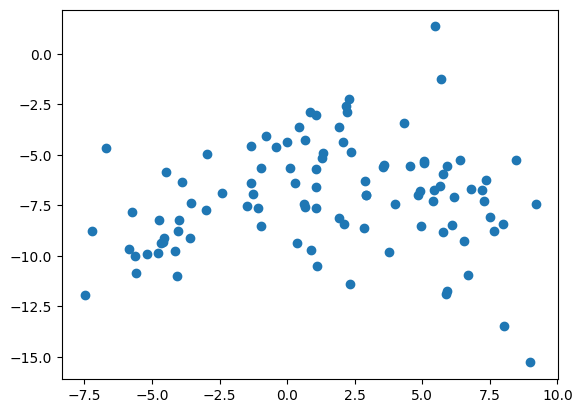

In [4]:
plt.scatter(X[:, 0], X[:, 1])

### Иерархическая кластеризация выборки

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram

### Иерархическая кластеризация выборки

In [6]:
mergings_single = linkage(X, method='single')
mergings_complete = linkage(X, method='complete')
mergings_ward = linkage(X, method='ward')

Text(0.5, 1.0, 'Расстояние Уорда')

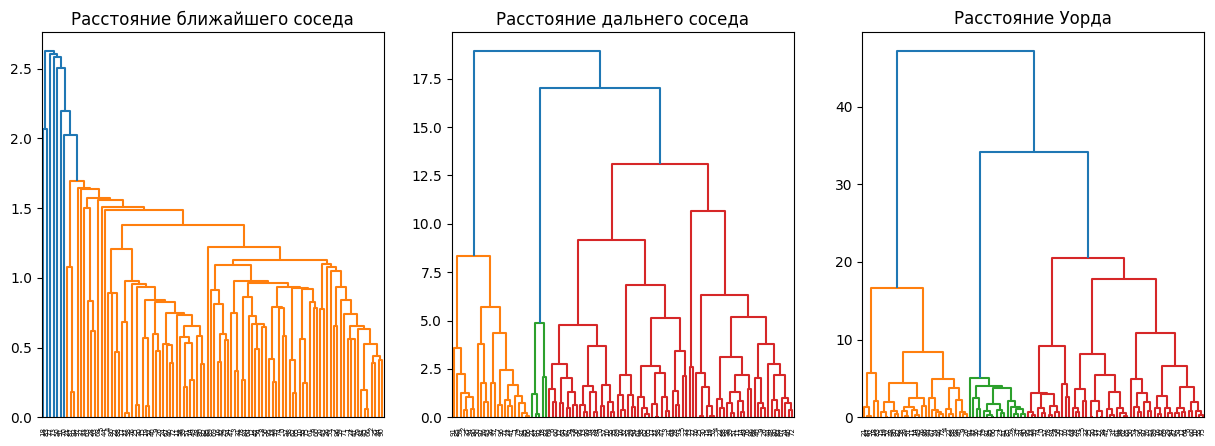

In [7]:
# Расстояние ближайшего соседа (single)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
dendrogram(mergings_single, ax=axes[0])
axes[0].set_title('Расстояние ближайшего соседа')

# Расстояние дальнего соседа (complete)
dendrogram(mergings_complete, ax=axes[1])
axes[1].set_title('Расстояние дальнего соседа')

# Расстояние Уорда (Ward)
dendrogram(mergings_ward, ax=axes[2])
axes[2].set_title('Расстояние Уорда')


### Выбор лучшего разбиения

In [8]:
mergings_ward = linkage(X, method='ward')


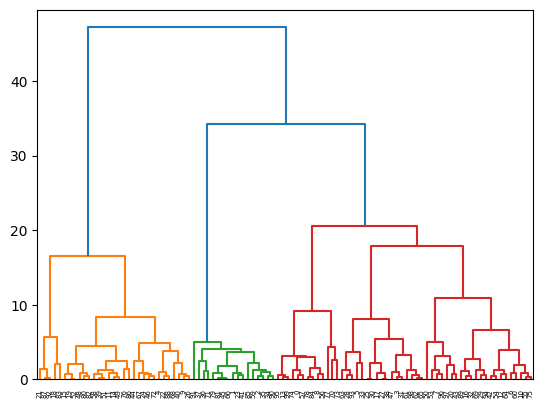

In [9]:
dendrogram(mergings_ward)
plt.show()

In [10]:
import numpy as np

def update_cluster_centers(X, c):
    centers = np.zeros((4, 2))
    for i in range(1, 5):
        ix = np.where(c == i)
        centers[i - 1, :] = np.mean(X[ix, :], axis=1)
    return centers

In [11]:
from scipy.cluster.hierarchy import fcluster

In [12]:
T = fcluster(mergings_ward, 4, criterion='maxclust')
clusters = update_cluster_centers(X, T)
clusters

array([[ 6.37122822, -7.91177036],
       [-5.05306944, -9.50920206],
       [ 2.43073214, -2.89776377],
       [ 0.05303738, -6.88497244]])

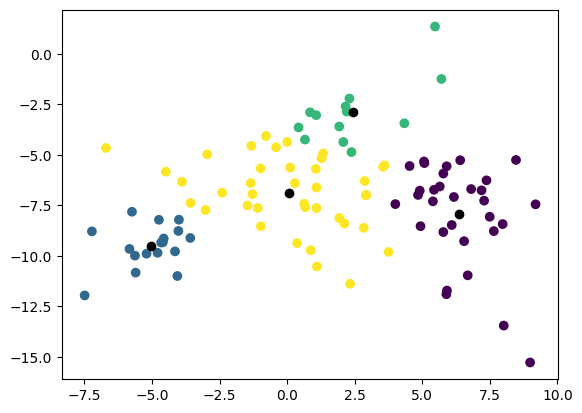

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=T)
plt.scatter(clusters[:, 0], clusters[:, 1], c='black')

In [14]:
from sklearn.metrics.pairwise import euclidean_distances

In [15]:
#сумма квадратов расстояний до центроида
sum_sq_dist = np.zeros(4)
for i in range(1, 5):
    ix = np.where(T == i)
    sum_sq_dist[i - 1] = np.sum(euclidean_distances(*X[ix, :], [clusters[i - 1]]) ** 2)
sum_sq_dist = np.sum(sum_sq_dist) / 4
sum_sq_dist

171.04000058853853

In [16]:
#средняя сумма средних внутрикластерных расстояний
sum_avg_intercluster_dist = np.zeros(4)
for i in range(1, 5):
    ix = np.where(T == i)
    sum_avg_intercluster_dist[i - 1] = np.sum(euclidean_distances(*X[ix, :], [clusters[i - 1]]) ** 2) / len(*X[ix, :])
sum_avg_intercluster_dist = np.sum(sum_avg_intercluster_dist) / 4
sum_avg_intercluster_dist

5.936502936490278

In [17]:
#сумма межкластерных расстояний
sum_intercluster_dist = np.sum(euclidean_distances(clusters, clusters))
sum_intercluster_dist

89.36575872390782

### 7) Провести кластеризацию выборки методом k-средних. для k [1, 10].

In [18]:
from sklearn.cluster import KMeans

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [19]:
models = []
predicted_values = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    models.append(kmeans)
    predicted_values.append(kmeans.predict(X))

In [20]:
sum_sq_dist_avg = []
for it, kmean in enumerate(models):
    sum_sq_dist_avg.append(kmean.inertia_ / (it + 1))
sum_sq_dist_avg

[2592.844849872166,
 622.3067233497138,
 255.29521731231,
 146.7823357920375,
 90.6096691936283,
 61.286111529303604,
 44.0775274731589,
 32.95797500655419,
 25.07436588499577,
 21.5850003567541]

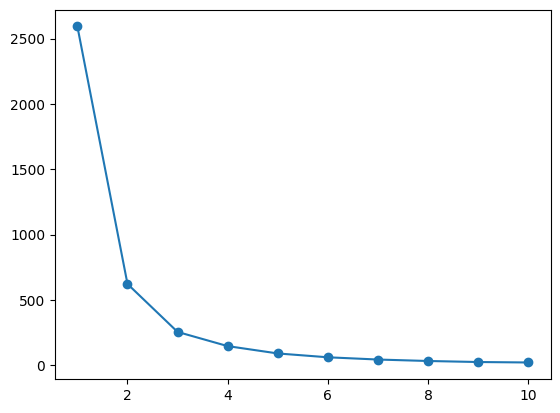

In [21]:
plt.plot(range(1, 11), sum_sq_dist_avg, '-o')

In [22]:
new_centers = [kmean.cluster_centers_ for kmean in models]

sum_avg_intercluster_dist_avg = []
for k, kmean in enumerate(models):
    intercluster_sum = np.zeros(4)
    for i in range(4):
        ix = np.where(predicted_values[k] == i)
        if len(ix[0]) == 0:
            intercluster_sum[i - 1] = 0
        else:
            intercluster_sum[i - 1] = np.sum(euclidean_distances(*X[ix, :], [kmean.cluster_centers_[i - 1]]) ** 2) / len(*X[ix, :])
    sum_avg_intercluster_dist_avg.append(np.sum(intercluster_sum) / (k + 1))
sum_avg_intercluster_dist_avg

[25.928448498721664,
 67.80377373606751,
 68.50494530182458,
 57.67590108365116,
 68.90786205033442,
 36.157073346876246,
 30.8887939503733,
 28.67849914779981,
 28.322238998781962,
 30.08161410398038]

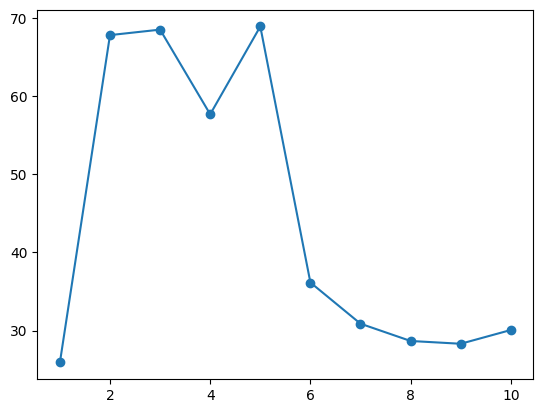

In [23]:
plt.plot(range(1, 11), sum_avg_intercluster_dist_avg, '-o')

In [24]:
sum_intercluster_dist_avg = []

for k, kmean in enumerate(models):
    value = np.sum(euclidean_distances(kmean.cluster_centers_, kmean.cluster_centers_))
    sum_intercluster_dist_avg.append(value / (k + 1))
sum_intercluster_dist_avg

[0.0,
 7.465592573607459,
 15.008098338276442,
 20.31743084956116,
 30.44979764840309,
 35.848507289178464,
 48.64594523187625,
 50.32509352353655,
 58.58194320338387,
 66.035508767302]

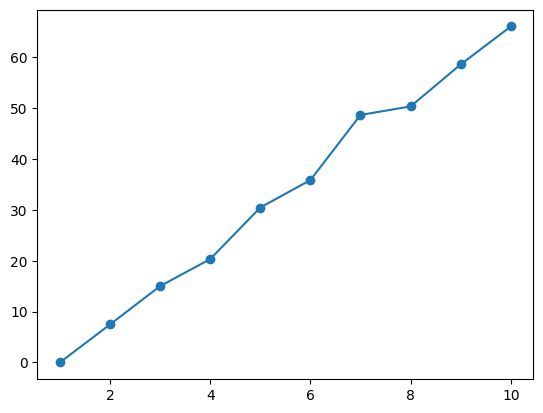

In [25]:
plt.plot(range(1, 11), sum_intercluster_dist_avg, '-o')

#### Cравнительная таблица

In [26]:
import pandas as pd

In [27]:
columns = pd.MultiIndex.from_product([['Иерархический метод', 'Метод k-средних'],
                                      ['Сумма квадратов расстояний до центроида', 'Сумма средних внутрикластерных расстояний', 'Сумма межкластерных расстояний']])
df = pd.DataFrame(columns=columns)

In [28]:
df['Иерархический метод', 'Сумма квадратов расстояний до центроида'] = [sum_sq_dist for _ in range(len(sum_sq_dist_avg))]
df['Иерархический метод', 'Сумма средних внутрикластерных расстояний'] = [sum_avg_intercluster_dist for _ in range(len(sum_avg_intercluster_dist_avg))]
df['Иерархический метод', 'Сумма межкластерных расстояний'] = [sum_intercluster_dist for _ in range(len(sum_intercluster_dist_avg))]

df['Метод k-средних', 'Сумма квадратов расстояний до центроида'] = sum_sq_dist_avg
df['Метод k-средних', 'Сумма средних внутрикластерных расстояний'] = sum_avg_intercluster_dist_avg
df['Метод k-средних', 'Сумма межкластерных расстояний'] = sum_intercluster_dist_avg

df

Иерархический метод  \
  Сумма квадратов расстояний до центроида   
0                              171.040001   
1                              171.040001   
2                              171.040001   
3                              171.040001   
4                              171.040001   
5                              171.040001   
6                              171.040001   
7                              171.040001   
8                              171.040001   
9                              171.040001   

                                                                            \
  Сумма средних внутрикластерных расстояний Сумма межкластерных расстояний   
0                                  5.936503                      89.365759   
1                                  5.936503                      89.365759   
2                                  5.936503                      89.365759   
3                                  5.936503                      89.365759   
4                                  5.936503                      89.365759   
5                                  5.936503                      89.365759   
6                                  5.936503                      89.365759   
7                                  5.936503                      89.365759   
8                                  5.936503                      89.365759   
9                                  5.936503                      89.365759   

                          Метод k-средних  \
  Сумма квадратов расстояний до центроида   
0                             2592.844850   
1                              622.306723   
2                              255.295217   
3                              146.782336   
4                               90.609669   
5                               61.286112   
6                               44.077527   
7                               32.957975   
8                               25.074366   
9                               21.585000   

                                                                            
  Сумма средних внутрикластерных расстояний Сумма межкластерных расстояний  
0                                 25.928448                       0.000000  
1                                 67.803774                       7.465593  
2                                 68.504945                      15.008098  
3                                 57.675901                      20.317431  
4                                 68.907862                      30.449798  
5                                 36.157073                      35.848507  
6                                 30.888794                      48.645945  
7                                 28.678499                      50.325094  
8                                 28.322239                      58.581943  
9                                 30.081614                      66.035509

In [29]:
df.to_excel('result.xlsx')